In [4]:
!pip install wordcloud


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


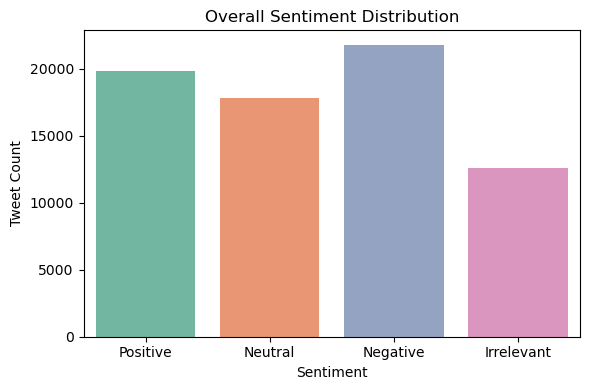

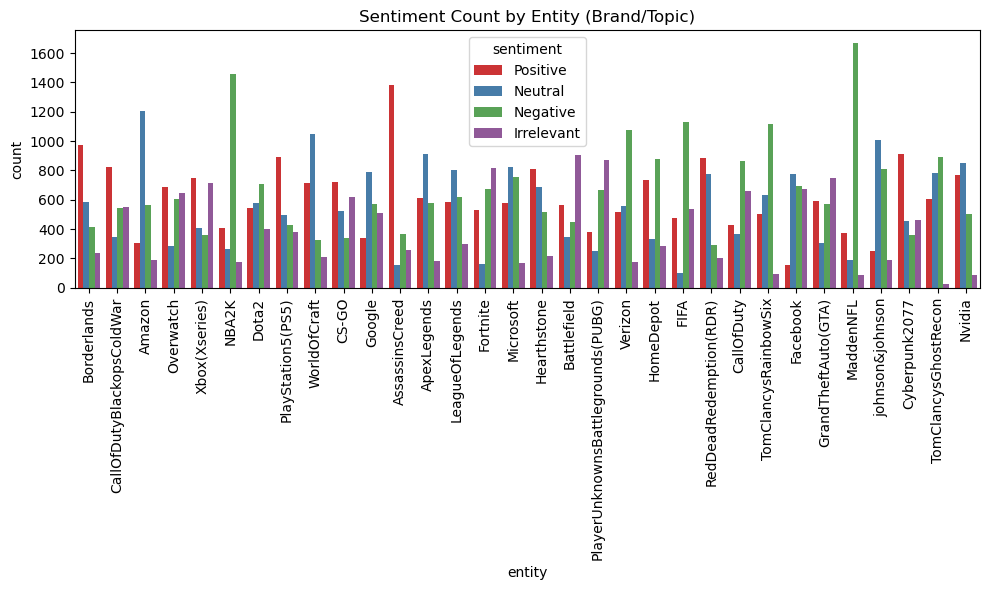

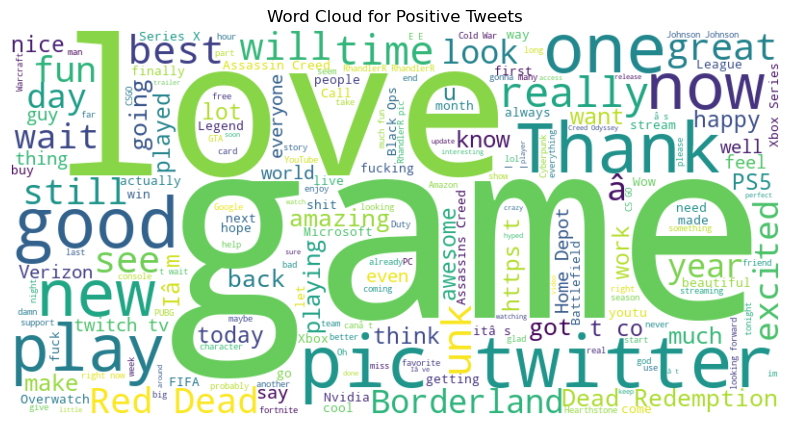

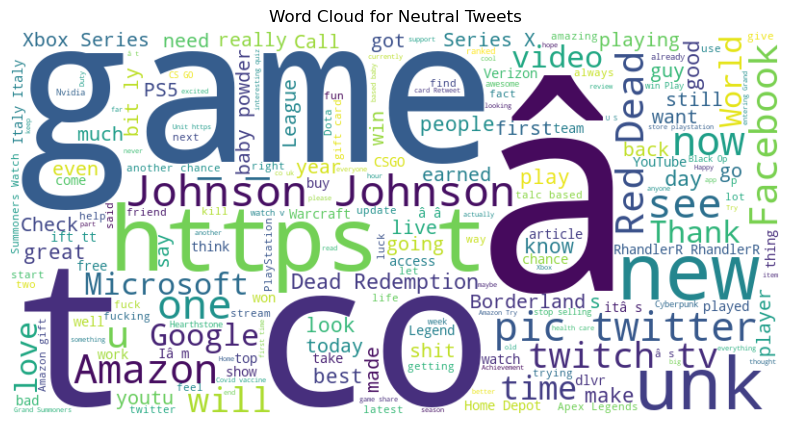

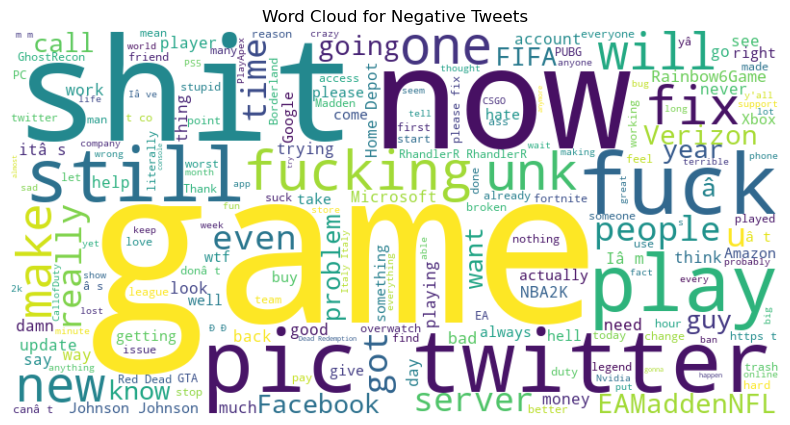

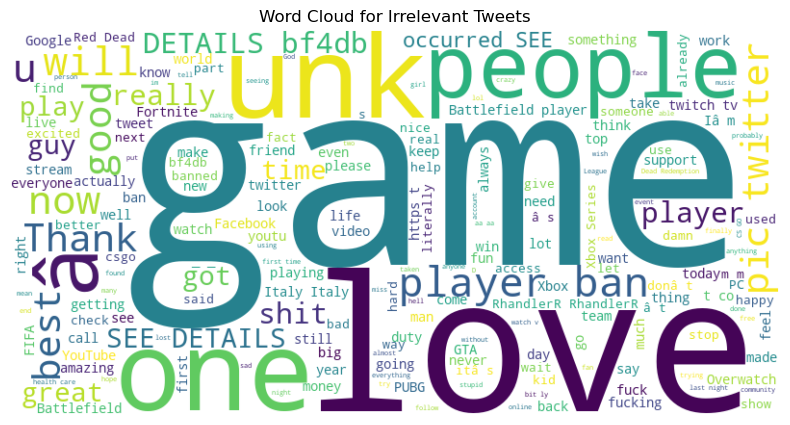

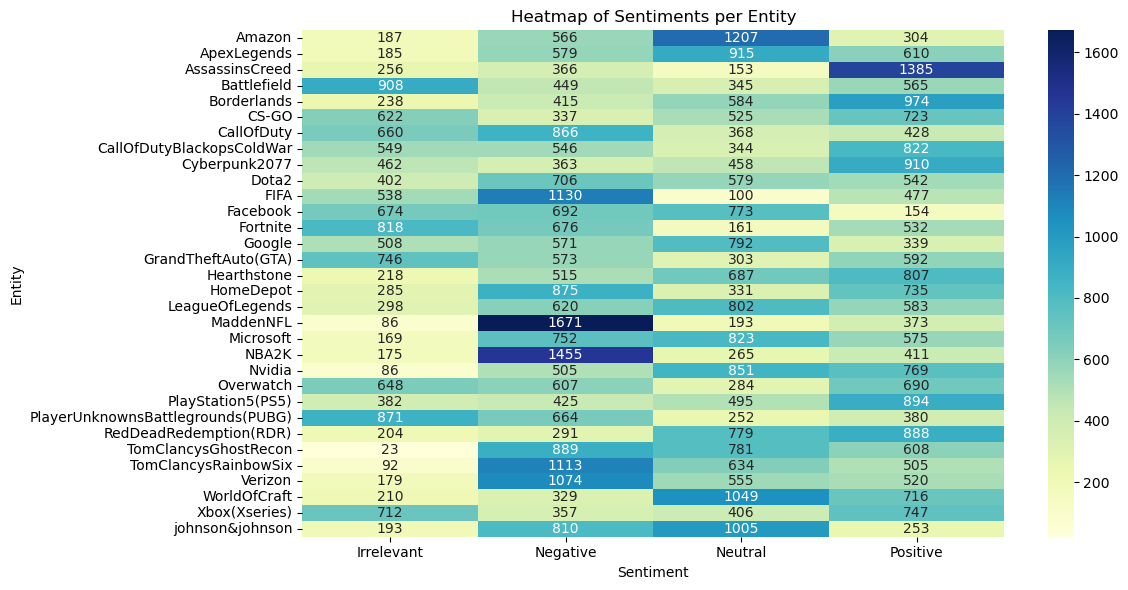


Top 5 Positive Tweets:
0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: tweet, dtype: object 

Top 5 Negative Tweets:
24    the biggest dissappoinment in my life came out...
25    The biggest disappointment of my life came a y...
27    the biggest dissappoinment in my life coming o...
28    For the biggest male dissappoinment in my life...
29    the biggest dissappoinment in my life came bac...
Name: tweet, dtype: object


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_excel("twitter_training.xlsx") 

print(df.info())
print(df['sentiment'].value_counts())

df = df.drop_duplicates()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='entity', hue='sentiment', palette='Set1')
plt.title("Sentiment Count by Entity (Brand/Topic)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['tweet'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

heatmap_data = pd.crosstab(df['entity'], df['sentiment'])
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Sentiments per Entity")
plt.ylabel("Entity")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

print("\nTop 5 Positive Tweets:")
print(df[df['sentiment'] == 'Positive']['tweet'].head(5), "\n")

print("Top 5 Negative Tweets:")
print(df[df['sentiment'] == 'Negative']['tweet'].head(5))
